In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.manifold import MDS
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from skimage.color import rgb2gray
from mpl_toolkits.mplot3d import Axes3D
from IPython.core.display import display

import warnings

In [2]:
warnings.simplefilter('ignore')
plt.rcParams['figure.figsize'] = (8,8)

# Task 1

In [3]:
data = pd.read_csv('Musk1.csv', header=None)
data.columns = ['BagClass', 'BagId', *['Feature{}'.format(i) for i in range(1, 167)]]
labels, features = data.iloc[:, :2], data.iloc[:, 2:]

In [4]:
display(labels.head(1))

,BagClass,BagId
0,1,1


In [5]:
features.head(1)

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,...,Feature157,Feature158,Feature159,Feature160,Feature161,Feature162,Feature163,Feature164,Feature165,Feature166
0,42,-198,-109,-75,-117,11,23,-88,-28,-27,...,-238,-74,-129,-120,-38,30,48,-37,6,30


In [6]:
data.head(1)

,BagClass,BagId,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,...,Feature157,Feature158,Feature159,Feature160,Feature161,Feature162,Feature163,Feature164,Feature165,Feature166
0,1,1,42,-198,-109,-75,-117,11,23,-88,...,-238,-74,-129,-120,-38,30,48,-37,6,30


### a) Applying PCA and MDS

In [7]:
# Scaling the feature columns
features = pd.DataFrame(scale(features), 
                        columns=features.columns)

# Applying PCA
pca = PCA(n_components=3)
pca_df = pd.DataFrame(pca.fit_transform(features))
pca_df = pca_df.join(labels)

# Applying MDS
mds = MDS(n_components=3)
mds_df = pd.DataFrame(mds.fit_transform(features))
mds_df = mds_df.join(labels)

In [8]:
print(pca.explained_variance_ratio_)
print(mds.stress_)

[0.31188125 0.13921923 0.07618026]
1316935.2338376201


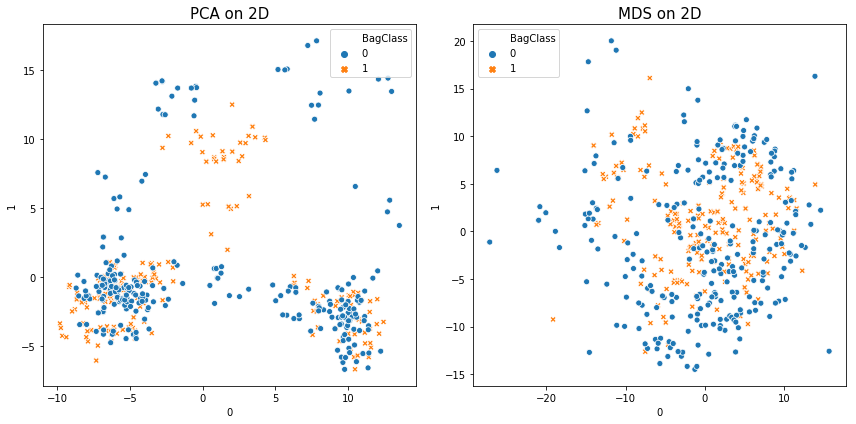

In [9]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12,6))

ax = axes.ravel()

sns.scatterplot(x=0, y=1, hue="BagClass", style="BagClass", data=pca_df, ax=ax[0])
ax[0].set_title("PCA on 2D", size=15)
sns.scatterplot(x=0, y=1, hue="BagClass", style="BagClass", data=mds_df, ax=ax[1])
ax[1].set_title("MDS on 2D", size=15)

fig.tight_layout()

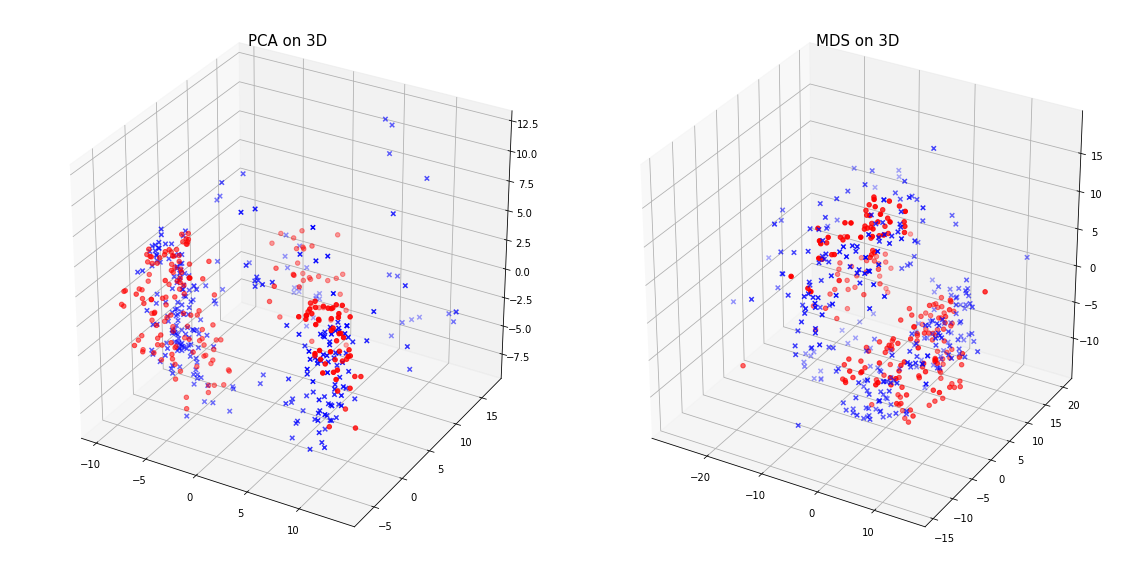

In [10]:
fig = plt.figure(figsize=(16,8))

ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

ax1.scatter(xs=pca_df[pca_df['BagClass'] == 1][0],
            ys=pca_df[pca_df['BagClass'] == 1][1], 
            zs=pca_df[pca_df['BagClass'] == 1][2],
            c='r', marker='o')
ax1.scatter(xs=pca_df[pca_df['BagClass'] == 0][0], 
            ys=pca_df[pca_df['BagClass'] == 0][1], 
            zs=pca_df[pca_df['BagClass'] == 0][2], 
            c='b', marker='x')
ax1.set_title("PCA on 3D", size=15)


ax2.scatter(xs=mds_df[mds_df['BagClass'] == 1][0], 
            ys=mds_df[mds_df['BagClass'] == 1][1], 
            zs=mds_df[mds_df['BagClass'] == 1][2], 
            c='r', marker='o')
ax2.scatter(xs=mds_df[mds_df['BagClass'] == 0][0], 
            ys=mds_df[mds_df['BagClass'] == 0][1], 
            zs=mds_df[mds_df['BagClass'] == 0][2], 
            c='b', marker='x')
ax2.set_title("MDS on 3D", size=15)

fig.tight_layout()

Explained variances for 3 component PCA is 0.31, 0.14 and 0.08 respectively. And stress for MDS is 1.307e6. Stress does not mean anything by its own but by explained variances we can understand that more than half of the variances can be understood by only 3 components. But 2 or 3 component will not be sufficient for separating our data according to their classes.

### b) Bag Level Calculation

In [11]:
bag_data = data.groupby('BagId').mean().reset_index(drop=True)
bag_label, bag_features = bag_data.iloc[:, :1], bag_data.iloc[:, 1:]

In [12]:
# Scaling the feature columns
bag_features = pd.DataFrame(scale(bag_features), 
                            columns=bag_features.columns)

# Applying PCA
pca_bag = PCA(n_components=3)
pca_bag_df = pd.DataFrame(pca_bag.fit_transform(bag_features))
pca_bag_df = pca_bag_df.join(bag_label)

# Applying MDS
mds_bag = MDS(n_components=3)
mds_bag_df = pd.DataFrame(mds_bag.fit_transform(bag_features))
mds_bag_df = mds_bag_df.join(bag_label)

print(pca_bag.explained_variance_ratio_)
print(mds_bag.stress_)

[0.26662286 0.19065605 0.13255029]
35246.437986639925


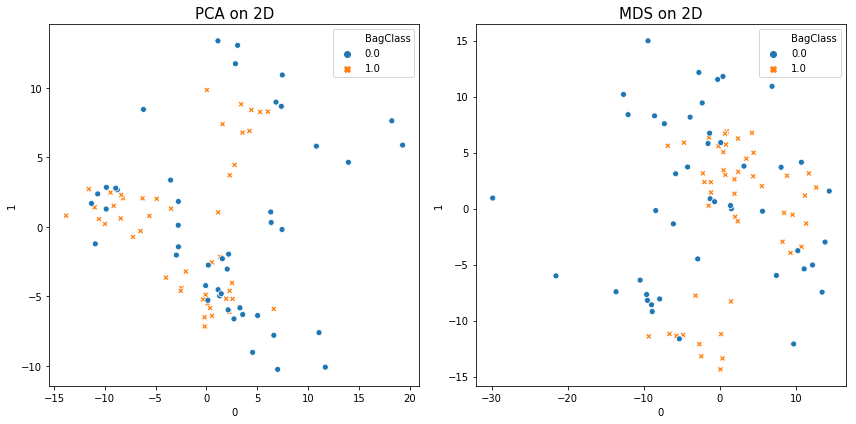

In [13]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12,6))

ax = axes.ravel()

sns.scatterplot(x=0, y=1, hue="BagClass", style="BagClass", data=pca_bag_df, ax=ax[0])
ax[0].set_title("PCA on 2D", size=15)
sns.scatterplot(x=0, y=1, hue="BagClass", style="BagClass", data=mds_bag_df, ax=ax[1])
ax[1].set_title("MDS on 2D", size=15)

fig.tight_layout()

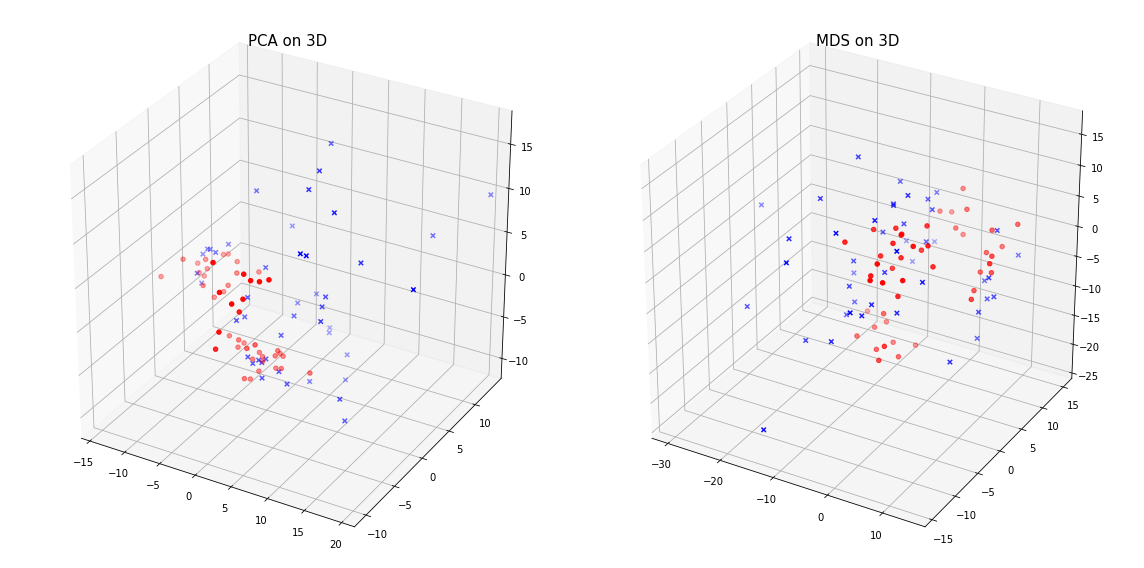

In [14]:
fig = plt.figure(figsize=(16,8))

ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

ax1.scatter(xs=pca_bag_df[pca_bag_df['BagClass'] == 1][0],
            ys=pca_bag_df[pca_bag_df['BagClass'] == 1][1], 
            zs=pca_bag_df[pca_bag_df['BagClass'] == 1][2],
            c='r', marker='o', zdir='y')
ax1.scatter(xs=pca_bag_df[pca_bag_df['BagClass'] == 0][0], 
            ys=pca_bag_df[pca_bag_df['BagClass'] == 0][1], 
            zs=pca_bag_df[pca_bag_df['BagClass'] == 0][2], 
            c='b', marker='x', zdir='y')
ax1.set_title("PCA on 3D", size=15)


ax2.scatter(xs=mds_bag_df[mds_bag_df['BagClass'] == 1][0], 
            ys=mds_bag_df[mds_bag_df['BagClass'] == 1][1], 
            zs=mds_bag_df[mds_bag_df['BagClass'] == 1][2], 
            c='r', marker='o', zdir='y')
ax2.scatter(xs=mds_bag_df[mds_bag_df['BagClass'] == 0][0], 
            ys=mds_bag_df[mds_bag_df['BagClass'] == 0][1], 
            zs=mds_bag_df[mds_bag_df['BagClass'] == 0][2], 
            c='b', marker='x', zdir='y')
ax2.set_title("MDS on 3D", size=15)

fig.tight_layout()

We still cannot cluster our data points easily, but it can be seen that in 3D PCA, blue points are above the half plane whereas all the reds and some of the blues are in below the plane. (I should be more explicit when mentioning about the plane, but it's somehow obvious.)

### c) Bonus

There are some approaches in algorithm like multi instance SVM [https://github.com/garydoranjr/misvm], or Fisher vectors [https://cs.nju.edu.cn/wujx/paper/icdm14_miFV.pdf] or bag encoding (what they do is taking bag's frequencies and explaining bags with their frequency distributions as long as I understood).

# Task 2 

###  1- Reading image and displaying

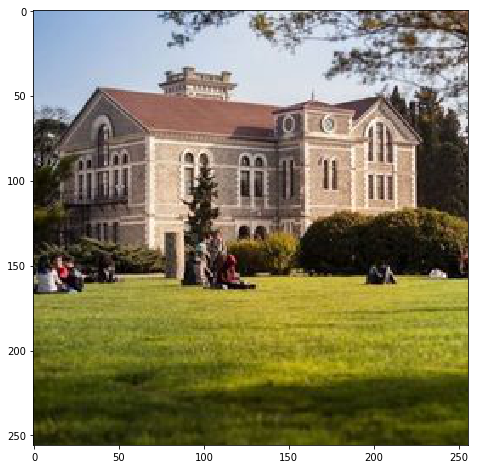

In [15]:
im = plt.imread('boun.jpg')
plt.imshow(im)
plt.show()

###  2- Creating noisy image and RGB channels separately

In [16]:
min_val, max_val = im.min(), im.max()/10
print('Min pixel value is {} and max pixel value / 10 is {}'.format(min_val, max_val))

Min pixel value is 0 and max pixel value / 10 is 25.5


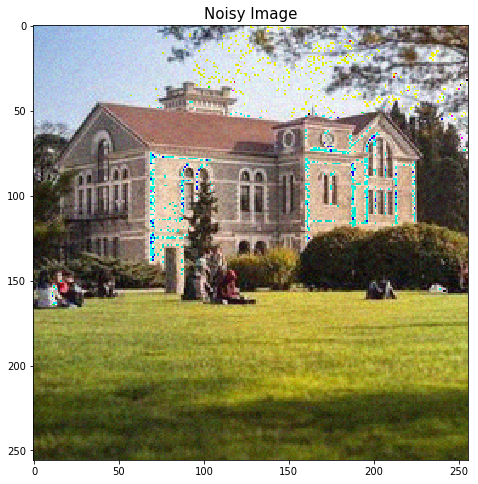

In [17]:
noise = np.uint8(np.random.uniform(min_val, max_val, (256, 256, 3)))
noisy_im = im + noise
plt.imshow(noisy_im)
plt.title('Noisy Image', size = 15)
plt.show()

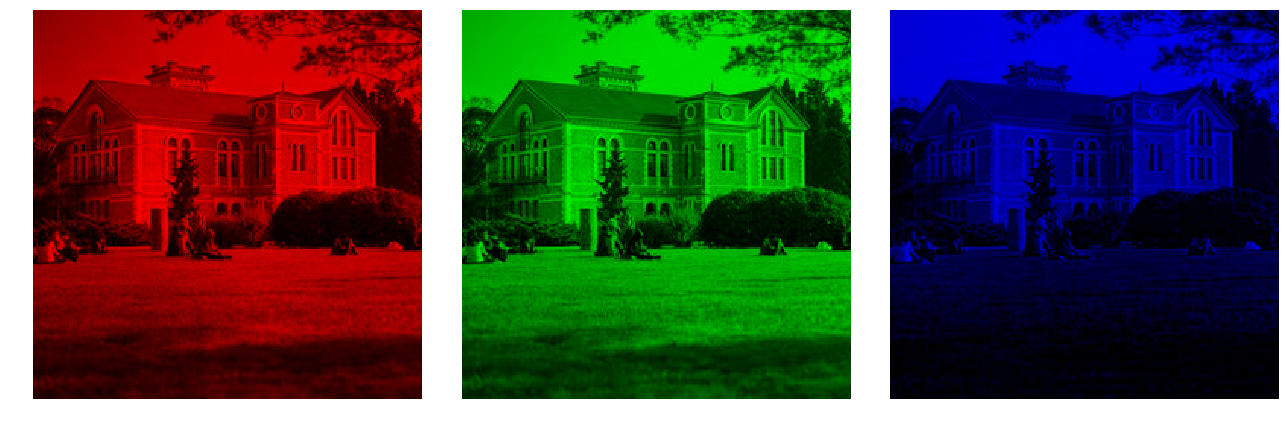

In [18]:
figure, plots = plt.subplots(ncols=3, nrows=1, figsize=(18, 12))

for i, subplot in zip(range(3), plots):
    temp = np.zeros(im.shape, dtype='uint8')
    temp[:,:,i] = im[:,:,i]
    subplot.imshow(temp)
    subplot.set_axis_off()

figure.tight_layout()
plt.show()

### 3- Transforming grayscale and creating batches

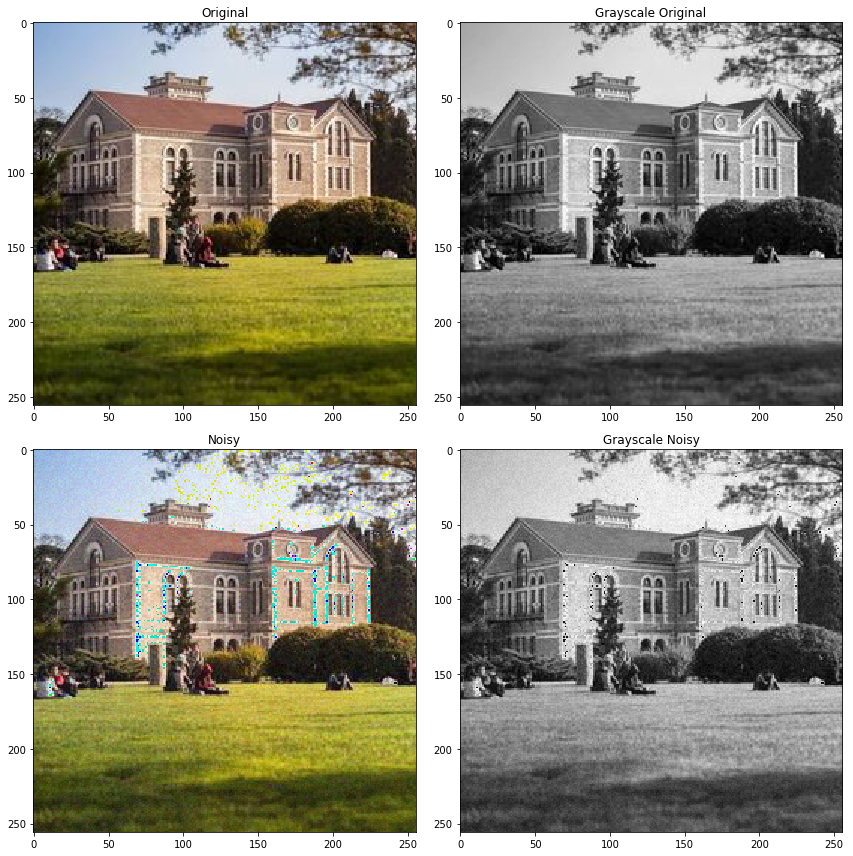

In [19]:
gray_im = rgb2gray(noisy_im)

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(12,12))

ax = axes.ravel()
ax[0].imshow(im)
ax[0].set_title("Original", size=12)
ax[1].imshow(rgb2gray(im), cmap=plt.cm.gray)
ax[1].set_title("Grayscale Original", size=12)
ax[2].imshow(noisy_im)
ax[2].set_title("Noisy", size=12)
ax[3].imshow(rgb2gray(noisy_im), cmap=plt.cm.gray)
ax[3].set_title("Grayscale Noisy", size=12)

fig.tight_layout()

In [20]:
# Creating batches

vectors = list()
for i in range(256-25):
  for j in range(256-25):
    vectors.append(gray_im[i:i+25, j:j+25].reshape(-1))
vectors = pd.DataFrame(vectors)

### 3-a) Applying PCA

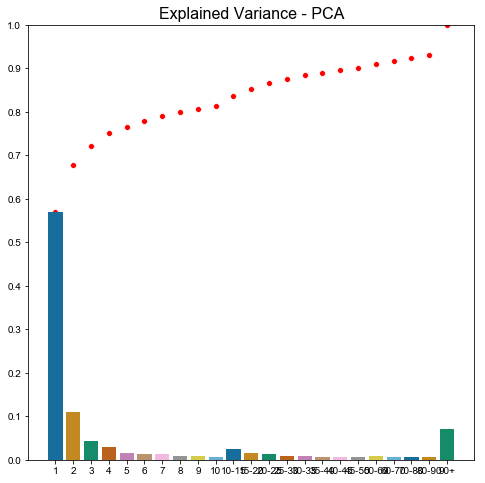

In [21]:
pca = PCA(n_components=625)
pca.fit(vectors)

ranges = [*[i+1 for i in range(10)], 
          *[5*i for i in range(3, 10)], 
          *[10*i for i in range(5, 10)]]
y1 = [sum(i) for i in np.split(pca.explained_variance_ratio_, ranges)]
x = ['1', 
     *[str(j) if i-j == -1 else '{}-{}'.format(i, j) for i,j in zip(ranges, ranges[1:])], 
     '{}+'.format(max(ranges))]
sns.barplot(x=x, y=y1, palette="colorblind")
sns.scatterplot(x=x, y=np.cumsum(y1), color='red')

sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
plt.title('Explained Variance - PCA', size=16)
plt.ylim(0,1)
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.show()

In [22]:
print(pca.explained_variance_ratio_[:10])
print(np.cumsum(pca.explained_variance_ratio_[:10]))

[0.56877231 0.10976835 0.043477   0.02912084 0.01477312 0.01263635
 0.01228933 0.00777466 0.007614   0.00689342]
[0.56877231 0.67854066 0.72201766 0.75113851 0.76591163 0.77854798
 0.7908373  0.79861196 0.80622597 0.81311939]


Variance by 625 features can be explained by up to 68 percent with only 2 feature, and by 8 dimension 80% of the variance can be explained. There is a strong relationship with this 625-length vectors. This might be because of for each change (shifting 1 unit right or down) only one row (or column) is affected, 600 of 625 entries remain the same and 25 of them is updated. 

At the end of the day, we have (256-25)^2 squares of length 25, after converting squares to vectors we have 231x231 many vectors with size 625. Pca removes this size to (231x231, 3)

### 3-b) Plotting Components

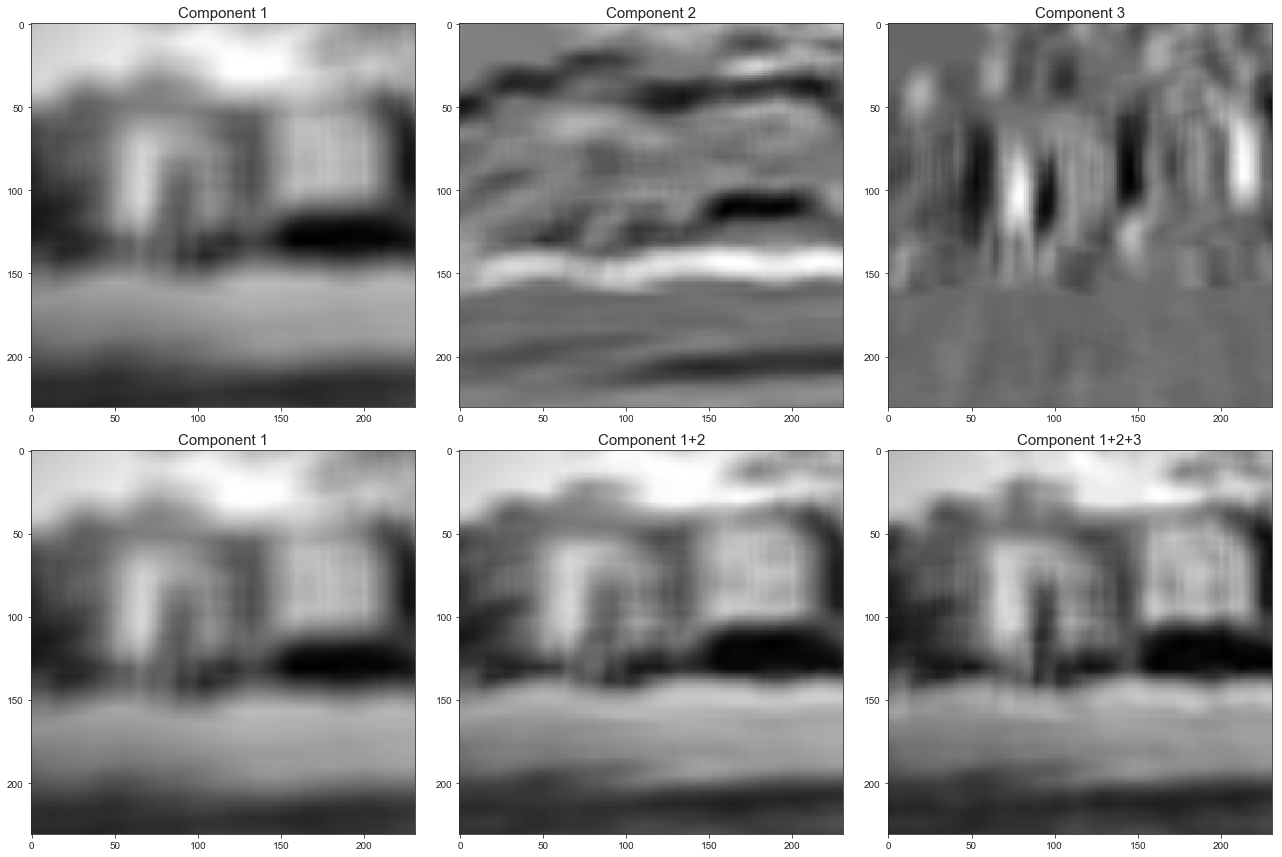

In [23]:
pca_image = PCA(n_components=3)
pca_vectors = pca_image.fit_transform(vectors)

fig, axes = plt.subplots(2, 3, figsize=(18,12))

ax = axes.ravel()

for i in range(3):
  sub_im = pca_vectors[:,i].reshape(231, 231)
  cum_im = pca_vectors[:,:i+1].sum(axis=1).reshape(231, 231)
  ax[i].imshow(sub_im, cmap=plt.cm.gray)
  ax[i].set_title("Component {}".format(i+1), size=15)
  ax[3+i].imshow(cum_im, cmap=plt.cm.gray)
  ax[3+i].set_title("Component {}".format('+'.join([str(x+1) for x in range(i+1)])), size=15)

fig.tight_layout()

### 3-c) Plotting Eigenvectors

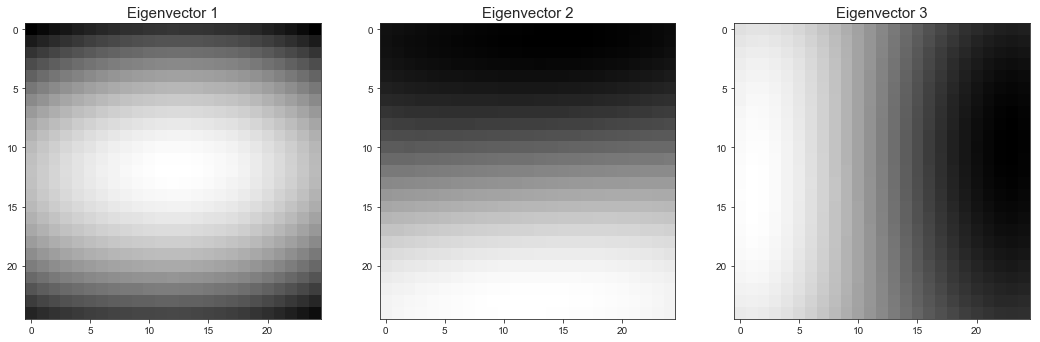

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(18,12))

ax = axes.ravel()

for i in range(3):
  eigenvector = pca_image.components_[i].reshape(25, 25)
  ax[i].imshow(eigenvector, cmap=plt.cm.gray)
  ax[i].set_title("Eigenvector {}".format(i+1), size=15)

First, we can visually "feel" that these eigenvectors are perpendicular (zeros and ones distributed at different focus points). Each eigenvector shows the importance of that image, what I mean is second eigenvector explains pictures horizontally whereas third one is explaining vertically. 